In [1]:
import random

Definimos la función objetivo

In [2]:
def funcion_objetivo(x):
    return x ** 2

Creamos la población inicial

In [3]:
def crear_poblacion(tamano):
    return [random.randint(0, 100) for _ in range(tamano)]

Evaluar la aptitud

In [4]:
def evaluar_poblacion(poblacion):
    return [funcion_objetivo(individuo) for individuo in poblacion]

Seleción de los mejores individuos

In [5]:
def seleccion(poblacion, fitness):
    return random.choices(poblacion, weights=fitness, k=2)

Aplicar crossover & mutación

In [6]:
def cruzar(padre1, padre2):
    return (padre1 + padre2) // 2  # Promedio de los dos padres

In [7]:
def mutar(individuo, tasa_mutacion=0.1):
    if random.random() < tasa_mutacion:
        return random.randint(0, 100)  # Nueva mutación aleatoria
    return individuo

Evolucionar la siguiente generación

In [10]:
# Parámetros
tamano_poblacion = 1000
generaciones = 100

# Inicialización de la población
poblacion = crear_poblacion(tamano_poblacion)

for _ in range(generaciones):
    fitness = evaluar_poblacion(poblacion)
    nueva_poblacion = []

    for _ in range(tamano_poblacion // 2):
        padre1, padre2 = seleccion(poblacion, fitness)
        hijo = cruzar(padre1, padre2)
        nuevo_hijo = mutar(hijo)
        nueva_poblacion.append(nuevo_hijo)

    poblacion = nueva_poblacion  # Reemplazamos la población anterior con la nueva

print("Población final:", poblacion)

Población final: [81, 76, 78, 79, 78, 83, 64, 83, 77, 78, 79, 81, 80, 77, 80, 81, 70, 80, 78, 79, 79, 76, 79, 82, 79, 79, 78, 80, 80, 75, 81, 77, 76, 78, 78, 80, 79, 78, 76, 79, 77, 83, 78, 76, 79, 80, 78, 77, 75, 79, 81, 76, 79, 78, 80, 77, 83, 81, 78, 81, 78, 78, 68, 81, 87, 74, 84, 75, 78, 81, 78, 12, 81, 80, 78, 79, 79, 79, 89, 77, 65, 77, 76, 78, 81, 79, 5, 81, 75, 77, 80, 89, 83, 78, 78, 77, 71, 83, 77, 78, 77, 79, 78, 80, 80, 77, 79, 86, 85, 79, 1, 83, 79, 76, 77, 79, 76, 81, 89, 75, 77, 79, 76, 79, 66, 76, 85, 83, 78, 77, 83, 82, 80, 79, 85, 67, 82, 74, 59, 77, 78, 85, 78, 79, 84, 80, 82, 78, 78, 73, 76, 79, 88, 78, 83, 80, 17, 75, 81, 74, 76, 79, 82, 78, 79, 78, 81, 83, 79, 79, 79, 79, 89, 82, 78, 80, 78, 80, 83, 79, 69, 78, 77, 82, 82, 79, 78, 70, 79, 19, 79, 86, 77, 78, 79, 81, 80, 79, 77, 78, 77, 76, 78, 7, 78, 79, 83, 78, 18, 89, 72, 17, 83, 77, 78, 69, 0, 87, 80, 80, 82, 78, 73, 77, 80, 78, 79, 77, 45, 82, 74, 80, 82, 80, 77, 66, 78, 83, 78, 80, 78, 79, 92, 79, 87, 80, 78

La ecuación  y=ax2+bx+c, cuando se representa gráficamente, crea una parábola. Utilizaremos un algoritmo genético para encontrar la combinación de valores de a, b y c que dé como resultado la parábola más plana. Aquí tienes un avance de lo que conseguiremos:

In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

In [12]:
def fitness_function(params):
    a, b, c = params
    if a <= 0:
        return -float('inf')
    vertex_x = -b / (2 * a)
    vertex_y = a * (vertex_x ** 2) + b * vertex_x + c 
    y_left = a * (-1) ** 2 + b * (-1) + c 
    y_right = a * (1) ** 2 + b * (1) + c 
    curviness = abs(y_left - vertex_y) + abs(y_right - vertex_y)
    return -curviness

In [13]:
def create_initial_population(size, lower_bound, upper_bound):
    population = []
    for _ in range(size):
        individual = (random.uniform(lower_bound, upper_bound),
                      random.uniform(lower_bound, upper_bound),
                      random.uniform(lower_bound, upper_bound))
        population.append(individual)
    return population

In [14]:
def selection(population, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitnesses)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

In [15]:
def crossover(parent1, parent2):
    alpha = random.random()
    child1 = tuple(alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2))
    child2 = tuple(alpha * p2 + (1 - alpha) * p1 for p1, p2 in zip(parent1, parent2))
    return child1, child2

In [16]:
def mutation(individual, mutation_rate, lower_bound, upper_bound):
    individual = list(individual)
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            mutation_amount = random.uniform(-1, 1)
            individual[i] += mutation_amount
            individual[i] = max(min(individual[i], upper_bound), lower_bound)
    return tuple(individual)

In [17]:
def genetic_algorithm(population_size, lower_bound, upper_bound, generations, mutation_rate):
    population = create_initial_population(population_size, lower_bound, upper_bound)
    
    # Prepare for plotting
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column for subplots
    best_performers = []
    all_populations = []

    # Prepare for table
    table = PrettyTable()
    table.field_names = ["Generation", "a", "b", "c", "Fitness"]

    for generation in range(generations):
        fitnesses = [fitness_function(ind) for ind in population]

        # Store the best performer of the current generation
        best_individual = max(population, key=fitness_function)
        best_fitness = fitness_function(best_individual)
        best_performers.append((best_individual, best_fitness))
        all_populations.append(population[:])
        table.add_row([generation + 1, best_individual[0], best_individual[1], best_individual[2], best_fitness])

        population = selection(population, fitnesses)

        next_population = []
        for i in range(0, len(population), 2):
            parent1 = population[i]
            parent2 = population[i + 1]

            child1, child2 = crossover(parent1, parent2)

            next_population.append(mutation(child1, mutation_rate, lower_bound, upper_bound))
            next_population.append(mutation(child2, mutation_rate, lower_bound, upper_bound))

        # Replace the old population with the new one, preserving the best individual
        next_population[0] = best_individual
        population = next_population

    # Print the table
    print(table)

    # Plot the population of one generation (last generation)
    final_population = all_populations[-1]
    final_fitnesses = [fitness_function(ind) for ind in final_population]

    axs[0].scatter(range(len(final_population)), [ind[0] for ind in final_population], color='blue', label='a')
    axs[0].scatter([final_population.index(best_individual)], [best_individual[0]], color='cyan', s=100, label='Best Individual a')
    axs[0].set_ylabel('a', color='blue')
    axs[0].legend(loc='upper left')
    
    axs[1].scatter(range(len(final_population)), [ind[1] for ind in final_population], color='green', label='b')
    axs[1].scatter([final_population.index(best_individual)], [best_individual[1]], color='magenta', s=100, label='Best Individual b')
    axs[1].set_ylabel('b', color='green')
    axs[1].legend(loc='upper left')
    
    axs[2].scatter(range(len(final_population)), [ind[2] for ind in final_population], color='red', label='c')
    axs[2].scatter([final_population.index(best_individual)], [best_individual[2]], color='yellow', s=100, label='Best Individual c')
    axs[2].set_ylabel('c', color='red')
    axs[2].set_xlabel('Individual Index')
    axs[2].legend(loc='upper left')
    
    axs[0].set_title(f'Final Generation ({generations}) Population Solutions')

    # Plot the values of a, b, and c over generations
    generations_list = range(1, len(best_performers) + 1)
    a_values = [ind[0][0] for ind in best_performers]
    b_values = [ind[0][1] for ind in best_performers]
    c_values = [ind[0][2] for ind in best_performers]
    fig, ax = plt.subplots()
    ax.plot(generations_list, a_values, label='a', color='blue')
    ax.plot(generations_list, b_values, label='b', color='green')
    ax.plot(generations_list, c_values, label='c', color='red')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Parameter Values')
    ax.set_title('Parameter Values Over Generations')
    ax.legend()

    # Plot the fitness values over generations
    best_fitness_values = [fit[1] for fit in best_performers]
    min_fitness_values = [min([fitness_function(ind) for ind in population]) for population in all_populations]
    max_fitness_values = [max([fitness_function(ind) for ind in population]) for population in all_populations]
    fig, ax = plt.subplots()
    ax.plot(generations_list, best_fitness_values, label='Best Fitness', color='black')
    ax.fill_between(generations_list, min_fitness_values, max_fitness_values, color='gray', alpha=0.5, label='Fitness Range')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.set_title('Fitness Over Generations')
    ax.legend()

    # Plot the quadratic function for each generation
    fig, ax = plt.subplots()
    colors = plt.cm.viridis(np.linspace(0, 1, generations))
    for i, (best_ind, best_fit) in enumerate(best_performers):
        color = colors[i]
        a, b, c = best_ind
        x_range = np.linspace(lower_bound, upper_bound, 400)
        y_values = a * (x_range ** 2) + b * x_range + c
        ax.plot(x_range, y_values, color=color)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Quadratic Function')

    # Create a subplot for the colorbar
    cax = fig.add_axes([0.92, 0.2, 0.02, 0.6]) 
    norm = plt.cm.colors.Normalize(vmin=0, vmax=generations)
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', label='Generation')

    plt.show()

    return max(population, key=fitness_function)

+------------+---------------------+----------------------+---------------------+----------------------+
| Generation |          a          |          b           |          c          |       Fitness        |
+------------+---------------------+----------------------+---------------------+----------------------+
|     1      |  1.8742458187238213 | -0.08618336308543206 |  1.6107350962571658 |  -3.750473120345594  |
|     2      |  1.8742458187238213 | -0.08618336308543206 |  1.6107350962571658 |  -3.750473120345594  |
|     3      |  1.8742458187238213 | -0.08618336308543206 |  1.6107350962571658 |  -3.750473120345594  |
|     4      |  1.8742458187238213 | -0.08618336308543206 |  1.6107350962571658 |  -3.750473120345594  |
|     5      |  1.489645821446321  |  0.8034186971233821  |  -2.671041974713675 |  -3.195947707574086  |
|     6      |  1.1851368997079348 | 0.008962424856168744 |  0.8574063582454428 | -2.3703076879309104  |
|     7      |  1.1851368997079348 | 0.0089624248561687

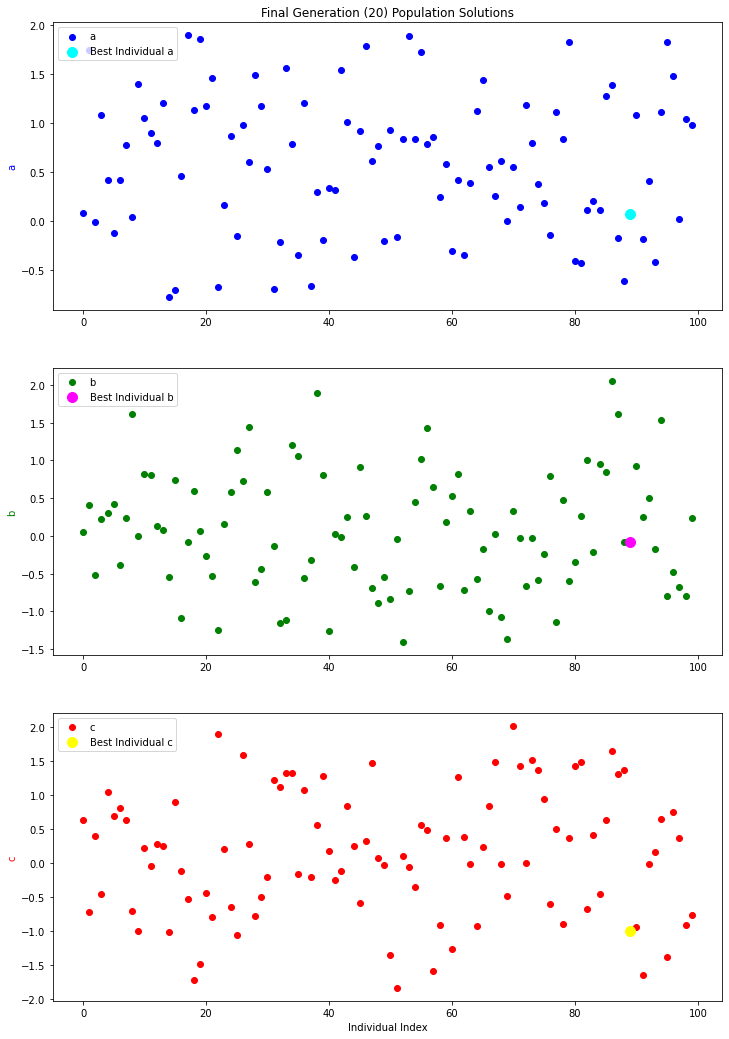

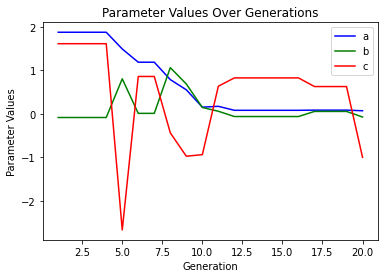

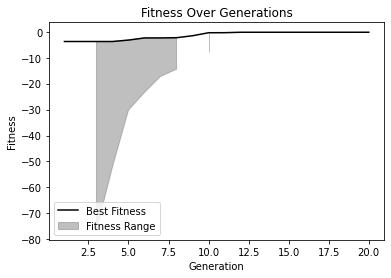

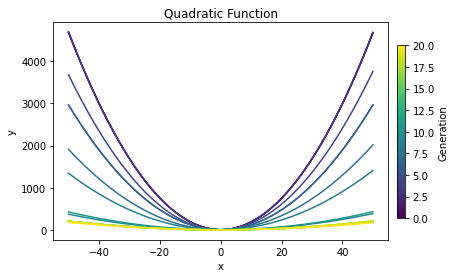

Best solution found: a = 0.011013360172829278, b = -0.01472568483383914, c = 0.7959409490695561


In [18]:
population_size = 100
lower_bound = -50
upper_bound = 50
generations = 20
mutation_rate = 1

best_solution = genetic_algorithm(population_size, lower_bound, upper_bound, generations, mutation_rate)
print(f"Best solution found: a = {best_solution[0]}, b = {best_solution[1]}, c = {best_solution[2]}")

In [ ]:
def termination_condition(fitnesses, target_fitness):
    return max(fitnesses) >= target_fitness

#### Ejercicio
Incluir en el código anterior la condición de terminación

### Investigar las librerías GA & PyGAD